In [37]:
from simulator import NetworkSimulator
from packetrouter import QPacketRouter, RandomPacketRouter
from matplotlib import pyplot as plt

In [38]:
NUM_NODES = 40
NUM_PACKETS = 20000

In [39]:
def get_averages(total_times, kernel_size):
    return [sum(total_times[i*kernel_size:(i+1)*kernel_size])/kernel_size for i in range(int(len(total_times) / kernel_size))]

In [40]:
n_s = NetworkSimulator(NUM_NODES)
q_packet_router = QPacketRouter(n_s)
random_packet_router = RandomPacketRouter(n_s)

test_packets = n_s.generate_packets(NUM_PACKETS)

print("Random routing: ")
n_s.simulate_network_load(test_packets, random_packet_router, verbose=True)

total_times = [packet.totalTime for packet in test_packets]
kernel_size = 100
random_average_times = get_averages(total_times, kernel_size)

for packet in test_packets: packet.reset()

print("Q-Routing:")
n_s.simulate_network_load(test_packets, q_packet_router, verbose=True)

total_times = [packet.totalTime for packet in test_packets]
kernel_size = 100
q_average_times = get_averages(total_times, kernel_size)

Random routing: 
 avg path length:       51.915750
 avg transmission time: 7702.534553
 dropped packets:       2639 / 20000
Q-Routing:
 avg path length:       73.969350
 avg transmission time: 3964.702935
 dropped packets:       53 / 20000


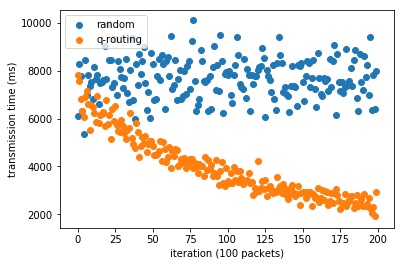

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(len(q_average_times)), random_average_times, label="random")
ax1.scatter(range(len(q_average_times)), q_average_times, label="q-routing")
plt.legend(loc='upper left')
plt.ylabel("transmission time (ms)")
plt.xlabel("iteration (100 packets)")
plt.savefig('random-vs-qrouting.png', dpi=300)